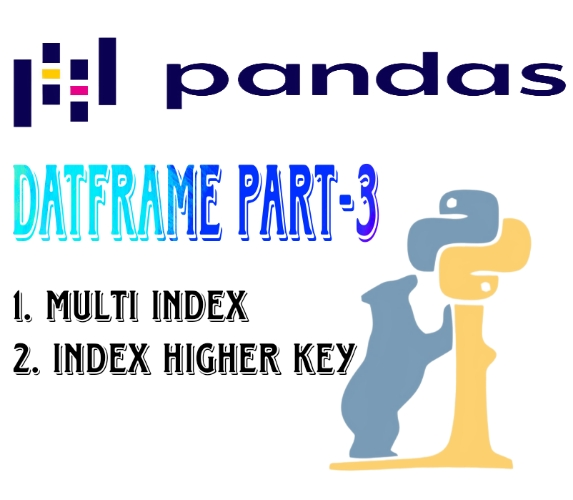

# DataFrame Part-3

* *We'll first create a quick example of wwhat a MultiIndexed data looks like and then how you can work with data frames to have a Multilevel Index.*

In [1]:
# Importing the modules:

import numpy as np 
import pandas as pd

In [2]:
# Index Levels:

outside = ["G1","G1","G1","G2","G2","G2"]
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

* We are trying to create a hierarchical index using the pandas.MultiIndex feature. A hierarchical index is a way to represent data with multiple levels of indexing. In this case, we have two lists, outside and inside, and you want to combine them to create a multi-level index for your DataFrame.

Let's break down the code step-by-step:

* 1. zip(outside, inside): The zip() function is used to combine elements from two or more iterables (in this case, the outside and inside lists) into tuples. For example, it will combine the first elements from both lists into a tuple, then the second elements into another tuple, and so on. The output will be a sequence of tuples like this: [("G1", 1), ("G1", 2), ("G1", 3), ("G2", 1), ("G2", 2), ("G2", 3)].

* 2. list(zip(outside, inside)): The list() function is used to convert the sequence of tuples into a list of tuples.

* 3. pd.MultiIndex.from_tuples(hier_index): Here, we use the pd.MultiIndex.from_tuples() function to create a hierarchical index from the list of tuples (hier_index). This will give you a pandas MultiIndex object.

* 4. By using this hierarchical index, you can create a multi-level DataFrame, which allows you to efficiently represent and manipulate data with multiple levels of grouping.

In [3]:
print(outside)
print(inside)
hier_index

['G1', 'G1', 'G1', 'G2', 'G2', 'G2']
[1, 2, 3, 1, 2, 3]


MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

* Note: We dont use it really in projects it's just for Customization

* We'll go in and say pd.DataFrame passing Randn and (6,2) so we have 6 rows and 2 columns and then 
* we will set the index as hier_index object we just made 
* then we will set the columns to be a list of [A,B]
* Alright .. Let's Code:

In [4]:
from numpy.random import randn

In [5]:
df = pd.DataFrame(randn(6,2),hier_index , ["A","B"])
df

A         B
G1 1 -1.585456  1.419921
   2 -1.088689 -0.572987
   3  1.204374 -0.845948
G2 1  0.592535 -0.211672
   2  0.873080 -0.331394
   3 -0.270301  1.220875

* Here we can have a Look we have Two Level of Index:
    - 1st G1 and G2
    - 2nd 1,2,3 and 1,2,3
* And then Two Columns A and B
* This DataFrame looks like it has Multi-Level of an Index, Otherwise known as an Index higher key

#### let's see How we can actually call data from a Multilevel for this index hierarchy

In [6]:
# For this we will use loc , That i have explained Earlier 

g1 = df.loc["G1"] #---> This become a single DataFrame now
g1

,A,B
1,-1.585456,1.419921
2,-1.088689,-0.572987
3,1.204374,-0.845948


In [7]:
g1.loc[1]  # For begineer you can do like this 

A   -1.585456
B    1.419921
Name: 1, dtype: float64

In [8]:
df.loc["G1"].loc[1] #--> For Experts and Experience Either way is right

A   -1.585456
B    1.419921
Name: 1, dtype: float64

In [9]:
df

A         B
G1 1 -1.585456  1.419921
   2 -1.088689 -0.572987
   3  1.204374 -0.845948
G2 1  0.592535 -0.211672
   2  0.873080 -0.331394
   3 -0.270301  1.220875

* As we can have a Look Our Indexes don't have Names 

In [10]:
df.index.names

FrozenList([None, None])

* We get a Frozen List telling us we dont have any names for it 
* Let's Name it Guys...

In [11]:
df.index.names = ["Groups","Num"]

In [12]:
df

A         B
Groups Num                    
G1     1   -1.585456  1.419921
       2   -1.088689 -0.572987
       3    1.204374 -0.845948
G2     1    0.592535 -0.211672
       2    0.873080 -0.331394
       3   -0.270301  1.220875

* Hopefully you will begin to see how this would be useful for multilevel index information that you want along with the dataFrames
* Let's think of Grabbing this Information :
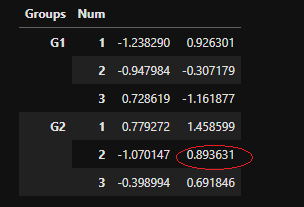
* *That's under Group - G2 -> Num - 2 --> Column B

In [13]:
g2 = df.loc["G2"]
g2

,A,B
Num,,
1,0.592535,-0.211672
2,0.873080,-0.331394
3,-0.270301,1.220875


In [14]:
g2.loc[2]

A    0.873080
B   -0.331394
Name: 2, dtype: float64

In [15]:
g2.loc[2]["B"]

-0.33139407297773277

In [16]:
df.loc["G2"].loc[2]["B"]

-0.33139407297773277

### Both way's are Correct!

## Let's go ahead and see one Last useful function called Cross-Section and it's Going to be XS

In [17]:
df.xs

<bound method NDFrame.xs of                    A         B
Groups Num                    
G1     1   -1.585456  1.419921
       2   -1.088689 -0.572987
       3    1.204374 -0.845948
G2     1    0.592535 -0.211672
       2    0.873080 -0.331394
       3   -0.270301  1.220875>

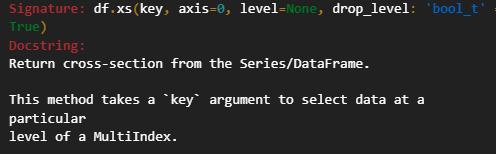

* *You can always check any Keyword function Usind Shift + Tab*

* you can only use df.xs when you multilevel index

In [18]:
# Let's see our DataFrame
df

A         B
Groups Num                    
G1     1   -1.585456  1.419921
       2   -1.088689 -0.572987
       3    1.204374 -0.845948
G2     1    0.592535 -0.211672
       2    0.873080 -0.331394
       3   -0.270301  1.220875

In [19]:
df.loc["G1"] # It gives us a DataFrame Under G1 Group

,A,B
Num,,
1,-1.585456,1.419921
2,-1.088689,-0.572987
3,1.204374,-0.845948


* But another option for a multilevel Index is using this XS as the cross sectio and then passing in G1 

In [20]:
df.xs("G1")

,A,B
Num,,
1,-1.585456,1.419921
2,-1.088689,-0.572987
3,1.204374,-0.845948


#### But what's the Speciality of the Cross Section is it has the Ability to skip or go inside the Multilevel Index


* Let's say we have this dataframe here and we wnt to grab all the values of number equal to one from both the groups
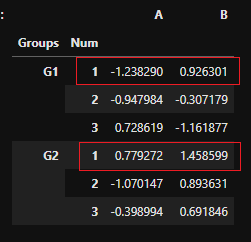

This type of problem is tricky in behalf of Loc but not using the XS or Cross Section MEthod

In [21]:
df.xs(1,level="Num") # This is where the Index name take place

,A,B
Groups,,
G1,-1.585456,1.419921
G2,0.592535,-0.211672


* So, Essentiallyy this allows us ti grab a cross section where level equals Num is equal to 1 and that's where we use mainly the XS or Cross Section
* And now we see both the groups where level num happens to be equals to 1 and This sort of data get's returned
* Don't worry too much since this is pretty advanced usage of Pandas

### Keep Learning Keep Growing 
#### Raj Kulhade...